In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
%ls

build/                     m_f_par_semantic_XSBERT.ipynb  xsbert/
demo.ipynb                 README.md                      xsbert.egg-info/
get_attribute_err.py       setup.py                       xsbert_test.ipynb
LICENSE                    train.py
m_f_par_scores_xsbert.csv  two_examples.png


In [12]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=69a76df6d6cad14f01bf6c08d7e5a1c68b5600949e86bb3bf9700d382ad58818
  Stored in directory: /home/jovyan/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [13]:
import torch
from xsbert import utils
from xsbert.models import XSMPNet, load_model

In [14]:
model_name = 'xs_distilroberta'
model = load_model(model_name, model_dir='../xs_models/')
model.to(torch.device('cuda:0'))

initializing


XSRoberta(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
)

In [15]:
model.reset_attribution()
model.init_attribution_to_layer(idx=4, N_steps=10)

In [16]:
!gpustat -cp

Error on querying NVIDIA devices. Use --debug flag for details


## load csv

In [17]:
m_f_scores = pd.read_csv("../male_female_par_scores.csv")

In [18]:
lexhub_labels = m_f_scores['value_f']-m_f_scores['value_m']>=0
lexhub_labels.value_counts()

True     1236
False     718
dtype: int64

In [19]:
m_labels = pd.read_csv("../baselines/base-male-all.csv")
f_labels = pd.read_csv("../baselines/base-female-all.csv")

In [20]:
m_labels.head(5)

,idx,sentences_df1,choices_df1,scores_df1,sentences_df2,choices_df2,scores_df2,targets
0,0,Tracy didn't go home that evening and resiste...,"['Make a new plan', 'Go home and see Riley', '...",0,Tracy skipped home that evening and fended of...,"['Make a new plan', 'Go home and see Riley', '...",2,2
1,1,Sydney walked past a homeless woman asking fo...,"['Sympathetic', 'Like a person who was unable ...",0,Sydney strolled by a homeless woman pleading ...,"['Sympathetic', 'Like a person who was unable ...",0,0
2,2,Sasha protected the patients' rights by makin...,"['Write new laws', 'Get petitions signed', 'Li...",1,Sasha safeguarded the patients' rights with a...,"['Write new laws', 'Get petitions signed', 'Li...",1,1
3,3,Jordan was in charge of taking the food on th...,['Horrible that he let his friends down on the...,0,Jordan was responsible for packing the grocer...,['Horrible that he let his friends down on the...,0,0
4,4,Kendall opened their mouth to speak and what ...,"['A very quiet person', 'A very passive person...",0,"Kendall opened their mouth to speak, and what...","['A very quiet person', 'A very passive person...",0,2


In [21]:
m_f_df = pd.DataFrame({
    'Original': m_labels['sentences_df1'],
    'Paraphrases_m': m_labels['sentences_df2'],
    'Paraphrases_f': f_labels['sentences_df2'],
    'choice_m': m_labels['scores_df2'],
    'choice_f': f_labels['scores_df2'],
    'choice_b': m_labels['scores_df1'],
    'target': m_labels['targets']
    
    # Add any other relevant columns
})

In [22]:
m_f_df

,Original,Paraphrases_m,Paraphrases_f,choice_m,choice_f,choice_b,target
0,Tracy didn't go home that evening and resiste...,Tracy skipped home that evening and fended of...,Tracy stayed out that night and deflected Ril...,2,2,0,2
1,Sydney walked past a homeless woman asking fo...,Sydney strolled by a homeless woman pleading ...,Sydney walked past a homeless woman begging f...,0,0,0,0
2,Sasha protected the patients' rights by makin...,Sasha safeguarded the patients' rights with a...,Sasha championed the cause of patients' right...,1,0,1,1
3,Jordan was in charge of taking the food on th...,Jordan was responsible for packing the grocer...,"As the trip organizer, Jordan failed to pack ...",0,0,0,0
4,Kendall opened their mouth to speak and what ...,"Kendall opened their mouth to speak, and what...","Kendall spoke up, and the words that came out...",0,0,0,2
...,...,...,...,...,...,...,...
1949,Bailey destroyed the enemy's bunker and won t...,Bailey single-handedly took out the enemy's h...,"With determination and strategic thinking, Ba...",0,0,2,0
1950,Kai told Kendall the reason about the acciden...,Kai explained to Kendall the reasons behind t...,Kai shared the details of the accident in the...,1,1,0,1
1951,Kai improved Jan's picture and she loved how ...,Kai enhanced Jan's photo and he received high...,Kai beautifully edited Jan's picture and she ...,0,2,2,2
1952,Tracy's kids wanted ice cream so Aubrey fed t...,Tracy's kiddos were jonesing for some ice cre...,Tracy's little ones were begging for ice crea...,1,1,1,1


### Baseline==Targets

In [23]:
df_base_true = m_f_df[m_f_df['choice_b']==m_f_df['target']]

In [24]:
df_base_true

,Original,Paraphrases_m,Paraphrases_f,choice_m,choice_f,choice_b,target
1,Sydney walked past a homeless woman asking fo...,Sydney strolled by a homeless woman pleading ...,Sydney walked past a homeless woman begging f...,0,0,0,0
2,Sasha protected the patients' rights by makin...,Sasha safeguarded the patients' rights with a...,Sasha championed the cause of patients' right...,1,0,1,1
3,Jordan was in charge of taking the food on th...,Jordan was responsible for packing the grocer...,"As the trip organizer, Jordan failed to pack ...",0,0,0,0
8,Riley layered down their arms with a blanket ...,Riley wrapped his arms with a blanket to stay...,Riley draped her arms with a soft blanket to ...,2,2,2,2
10,Carson kissed Alex gently on the cheek and as...,Carson pecked Alex lightly on the cheek and i...,Carson softly kissed Alex on the cheek and as...,1,1,1,1
...,...,...,...,...,...,...,...
1944,Kendall grabs Jordan's hands tightly. Kendall...,"Kendall grasps Jordan's hands firmly, implori...","Kendall takes Jordan's hands gently, hoping t...",0,0,0,0
1945,Austin was an intern and so he worked without...,Austin served as an intern and therefore he c...,"As a dedicated intern, Austin fulfilled his r...",2,2,2,2
1948,Kendall parallel parked so they could pass th...,Kendall expertly parallel parked to prove his...,Kendall carefully parallel parked to demonstr...,2,2,2,2
1951,Kai improved Jan's picture and she loved how ...,Kai enhanced Jan's photo and he received high...,Kai beautifully edited Jan's picture and she ...,0,2,2,2


In [25]:
df_base_true['Original'] = df_base_true['Original'].apply(lambda x: " ".join(x.split(".")[:-1]))
df_base_true['Paraphrases_m'] = df_base_true['Paraphrases_m'].apply(lambda x: " ".join(x.split(".")[:-1]))
df_base_true['Paraphrases_f'] = df_base_true['Paraphrases_f'].apply(lambda x: " ".join(x.split(".")[:-1]))

/tmp/ipykernel_24/1211966653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_true['Original'] = df_base_true['Original'].apply(lambda x: " ".join(x.split(".")[:-1]))
/tmp/ipykernel_24/1211966653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_true['Paraphrases_m'] = df_base_true['Paraphrases_m'].apply(lambda x: " ".join(x.split(".")[:-1]))
/tmp/ipykernel_24/1211966653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [46]:
xbert_attr_values_m_f = []
ra = []
rb = []
rr = []
attr_err = []

In [47]:
xbert_attr_values_m_f

[]

In [2]:
torch.cuda.empty_cache()
!gpustat -cp

NameError: name 'torch' is not defined

In [ ]:
for i, row in df_base_true.iloc[:100].iterrows():
    # print(row)
    A_m, tokens_a_m, tokens_b_m, score_m, ra_m, rb_m, rr_m = model.attribute_prediction(
        row['Original'], 
        row['Paraphrases_m'], 
        move_to_cpu=True,
        compute_lhs=True
    )
    
    attr_err_m = torch.abs(A_m.sum() - score_m).item()
    del A_m
    torch.cuda.empty_cache()
    
    A_f, tokens_a_f, tokens_b_f, score_f, ra_f, rb_f, rr_f = model.attribute_prediction(
    row['Original'], 
    row['Paraphrases_f'], 
    move_to_cpu=True,
    compute_lhs=True
    )
    
    attr_err_f = torch.abs(A_f.sum() - score_f).item()
    del A_f
    torch.cuda.empty_cache()
    
    print(f"Original: { row['Original']}")
    print(f"Paraphrase_m: { row['Paraphrases_m']}")
    print(f"Attribution score O-M: {score_m}")
    print(f"Paraphrase_f: { row['Paraphrases_f']}")
    print(f"Attribution score O-F: {score_f}")
    xbert_attr_values_m_f.append([score_m, score_f])
    
    print(f"ra, rb, rr: {[ra_m, ra_f]}, {[rb_m, rb_f]}, {[rr_m, rr_f]}")
    print(f"attr_error: {[attr_err_m, attr_err_f]}")
    ra.append([ra_m, ra_f])   
    rb.append([rb_m, rb_f])   
    rr.append([rr_m, rr_f])   
    attr_err.append([attr_err_m, attr_err_f]) 
    

100%|██████████| 768/768 [00:12<00:00, 63.30it/s]


Original:  Sydney walked past a homeless woman asking for change but did not have any money they could give to her  Sydney felt bad afterwards
Paraphrase_m:  Sydney strolled by a homeless woman pleading for spare change, but he had no cash to offer her  He felt a twinge of guilt later on
Attribution score O-M: 0.6907752156257629
Paraphrase_f:  Sydney walked past a homeless woman begging for coins, but she didn't have any money to give her  She felt a pang of regret afterward
Attribution score O-F: 0.7108311653137207
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.11270803213119507, 0.11435818672180176]


100%|██████████| 768/768 [00:07<00:00, 100.82it/s]


Original:  Sasha protected the patients' rights by making new laws regarding cancer drug trials
Paraphrase_m:  Sasha safeguarded the patients' rights with a legislative push for improved cancer drug trial regulations
Attribution score O-M: 0.9838961362838745
Paraphrase_f:  Sasha championed the cause of patients' rights by advocating for stricter laws governing cancer drug trials
Attribution score O-F: 0.924213707447052
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.13392841815948486, 0.12640529870986938]


100%|██████████| 768/768 [00:09<00:00, 79.14it/s]


Original:  Jordan was in charge of taking the food on the camping trip and left all the food at home
Paraphrase_m:  Jordan was responsible for packing the groceries for our camping trip, but he forgot to bring them along
Attribution score O-M: 0.7187691926956177
Paraphrase_f:  As the trip organizer, Jordan failed to pack the necessary food items for our camping adventure, leaving us with nothing to eat
Attribution score O-F: 0.7166962623596191
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.09936279058456421, 0.08902949094772339]


100%|██████████| 768/768 [00:07<00:00, 105.48it/s]


Original:  Riley layered down their arms with a blanket to keep warm
Paraphrase_m:  Riley wrapped his arms with a blanket to stay cozy
Attribution score O-M: 1.0003578662872314
Paraphrase_f:  Riley draped her arms with a soft blanket to keep warm and snuggle up
Attribution score O-F: 1.051269769668579
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.14528751373291016, 0.14572834968566895]


100%|██████████| 768/768 [00:07<00:00, 101.70it/s]


Original:  Carson kissed Alex gently on the cheek and asked to go to dinner
Paraphrase_m:  Carson pecked Alex lightly on the cheek and invited him out for a romantic dinner
Attribution score O-M: 0.881020724773407
Paraphrase_f:  Carson softly kissed Alex on the cheek and asked him out for a lovely dinner date
Attribution score O-F: 0.8566913604736328
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.15307050943374634, 0.14612269401550293]


100%|██████████| 768/768 [00:09<00:00, 79.09it/s]


Original:  Robin dried up the paper and lit it on fire and it blew away
Paraphrase_m:  Robin scorched the paper with his fiery gaze and let it blaze away
Attribution score O-M: 0.8131159543991089
Paraphrase_f:  Robin carefully dried up the paper with her gentle touch and set it ablaze, watching as it drifted away in the wind
Attribution score O-F: 0.8359066247940063
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.1244744062423706, 0.13144904375076294]


100%|██████████| 768/768 [00:08<00:00, 86.51it/s]


Original:  Skylar went camping with friends and found the best campsite
Paraphrase_m:  Skylar and his buddies discovered a top-notch campsite during their outdoor adventure
Attribution score O-M: 0.7005095481872559
Paraphrase_f:  Skylar had an amazing time camping with her gal pals and found a fantastic spot to set up their tents
Attribution score O-F: 0.7078741788864136
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.10676997900009155, 0.10364127159118652]


100%|██████████| 768/768 [00:08<00:00, 86.72it/s]


Original:  Due to his car breaking down, Robin decided to ride with Jan's friends to school
Paraphrase_m:  Robin had to ditch his busted car and hop in with Jan's buddies for a ride to school
Attribution score O-M: 0.8580299615859985
Paraphrase_f:  Since Robin's car wouldn't start, he joined Jan's group of friends for a reliable ride to class
Attribution score O-F: 0.8560043573379517
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.13699132204055786, 0.1402493119239807]


100%|██████████| 768/768 [00:08<00:00, 90.07it/s]


Original:  Cameron took Kai's compliment seriously after the ballgame ended
Paraphrase_m:  Cameron was impressed by Kai's praise after the game and took it to heart
Attribution score O-M: 0.8579397201538086
Paraphrase_f:  Cameron felt thrilled when Kai gave her a complement after the ballgame and appreciated the kind words
Attribution score O-F: 0.9241527318954468
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.15780818462371826, 0.15732359886169434]


100%|██████████| 768/768 [00:08<00:00, 88.57it/s]


Original:  Riley and the others were the best of friends and always supported each other
Paraphrase_m:  Riley and his buddies were tight-knit pals who always had each other's backs
Attribution score O-M: 0.7855814695358276
Paraphrase_f:  Riley and her girlfriends were the best of pals, always there for one another through thick and thin
Attribution score O-F: 0.746688961982727
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.11933666467666626, 0.11730062961578369]


100%|██████████| 768/768 [00:06<00:00, 117.02it/s]


Original:  Taylor gave help to a friend who was having trouble keeping up with their bills
Paraphrase_m:  Taylor lent a hand to his buddy who was struggling to pay bills on time
Attribution score O-M: 0.7534990310668945
Paraphrase_f:  Taylor offered support to her pal who was having difficulty managing their finances
Attribution score O-F: 0.707714319229126
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.11125296354293823, 0.10764610767364502]


100%|██████████| 768/768 [00:08<00:00, 90.04it/s]


Original:  Carson was at a friend's house but suddenly announced they needed to go home
Paraphrase_m:  Carson suddenly revealed he had to head back home due to an urgent matter at his place
Attribution score O-M: 0.6255325675010681
Paraphrase_f:  Carson exclaimed that she needed to leave her friend's house immediately to attend to something important at home
Attribution score O-F: 0.680261492729187
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.10887753963470459, 0.11268782615661621]


100%|██████████| 768/768 [00:10<00:00, 75.68it/s]


Original:  Tracy led their army and fought hard in the war until they sat upon the throne
Paraphrase_m:  Tracy commanded their troops with bravery and determination, ultimately securing victory and claiming the throne
Attribution score O-M: 0.878938615322113
Paraphrase_f:  Tracy skillfully directed her army, demonstrating remarkable strength and leadership in the war, resulting in her ascension to the throne
Attribution score O-F: 0.8121775984764099
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.12740594148635864, 0.11460787057876587]


100%|██████████| 768/768 [00:09<00:00, 77.96it/s]


Original:  Kendall watched baseball with his friends after working hard all week at his job
Paraphrase_m:  Kendall caught a ball game with his buddies after putting in a solid week at work
Attribution score O-M: 0.8258042931556702
Paraphrase_f:  Kendall spent his well-deserved downtime watching baseball with his pals after a long week of grinding at the office
Attribution score O-F: 0.780825138092041
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.157456636428833, 0.1451166272163391]


100%|██████████| 768/768 [00:09<00:00, 79.72it/s]


Original:  kai was bored and had nothing to do so he played card games
Paraphrase_m:  Kai was feeling restless and decided to pass the time by indulging in some card games
Attribution score O-M: 0.7953202724456787
Paraphrase_f:  Kai felt bored and needed something to do, so she pulled out her deck of cards and played a few games
Attribution score O-F: 0.9422093629837036
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.13470840454101562, 0.16649997234344482]


100%|██████████| 768/768 [00:08<00:00, 87.55it/s]


Original:  Aubrey gave it to Kai's friend  Kai had thought for sure and hoped that she would get it instead
Paraphrase_m:  Aubrey handed the item over to Kai's buddy, who had been hoping against hope that he would get it instead
Attribution score O-M: 0.7867974638938904
Paraphrase_f:  Aubrey gifted the item to Kai's friend, who had secretly wished and dreamed of receiving it
Attribution score O-F: 0.8403384685516357
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.1567898392677307, 0.1595863699913025]


100%|██████████| 768/768 [00:09<00:00, 83.18it/s]


Original:  jan took them to NYC so that they could experience the city for the first time
Paraphrase_m:  Jan took us on an adventure to NYC so we could explore the city for the first time
Attribution score O-M: 0.7459557056427002
Paraphrase_f:  Jan treated us to a trip to NYC so we could discover all the amazing sights and sounds for the first time
Attribution score O-F: 0.6766961812973022
ra, rb, rr: [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
attr_error: [0.11489379405975342, 0.10382747650146484]


100%|██████████| 768/768 [00:08<00:00, 88.48it/s]


In [1]:
xbert_attr_values_m_f

NameError: name 'xbert_attr_values_m_f' is not defined

In [32]:
# df_base_true['Paraphrases_m'].reset_index(drop=True)

In [31]:
embeddings_m = get_embeddings(df_base_true['Paraphrases_m'].reset_index(drop=True))
embeddings_f = get_embeddings(df_base_true['Paraphrases_f'].reset_index(drop=True))
embeddings_o = get_embeddings(df_base_true['Original'].reset_index(drop=True))

In [19]:
def cos(x, y):
    return (x * y).sum(axis=1) / (np.linalg.norm(x, axis=1) * np.linalg.norm(y, axis=1))

In [33]:
sim_m_o = cos(embeddings_o, embeddings_m)
sim_f_o = cos(embeddings_o, embeddings_f)
sim_avg = (sim_m_o + sim_f_o)/2
sim_avg

array([0.8817897 , 0.9074464 , 0.7463951 , ..., 0.8295325 , 0.87327784,
       0.8330411 ], dtype=float32)

In [34]:
df_base_true["avg_sim (sentence stransformer)"]=sim_avg

/tmp/ipykernel_23146/2995370328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_true["avg_sim (sentence stransformer)"]=sim_avg


In [35]:
df_base_true

,Original,Paraphrases_m,Paraphrases_f,choice_m,choice_f,choice_b,target,avg_sim (sentence stransformer)
1,Sydney walked past a homeless woman asking fo...,Sydney strolled by a homeless woman pleading ...,Sydney walked past a homeless woman begging f...,0,0,0,0,0.881790
2,Sasha protected the patients' rights by makin...,Sasha safeguarded the patients' rights with a...,Sasha championed the cause of patients' right...,1,0,1,1,0.907446
3,Jordan was in charge of taking the food on th...,Jordan was responsible for packing the grocer...,"As the trip organizer, Jordan failed to pack ...",0,0,0,0,0.746395
8,Riley layered down their arms with a blanket ...,Riley wrapped his arms with a blanket to stay...,Riley draped her arms with a soft blanket to ...,2,2,2,2,0.878957
10,Carson kissed Alex gently on the cheek and as...,Carson pecked Alex lightly on the cheek and i...,Carson softly kissed Alex on the cheek and as...,1,1,1,1,0.880850
...,...,...,...,...,...,...,...,...
1944,Kendall grabs Jordan's hands tightly. Kendall...,"Kendall grasps Jordan's hands firmly, implori...","Kendall takes Jordan's hands gently, hoping t...",0,0,0,0,0.868245
1945,Austin was an intern and so he worked without...,Austin served as an intern and therefore he c...,"As a dedicated intern, Austin fulfilled his r...",2,2,2,2,0.877634
1948,Kendall parallel parked so they could pass th...,Kendall expertly parallel parked to prove his...,Kendall carefully parallel parked to demonstr...,2,2,2,2,0.829533
1951,Kai improved Jan's picture and she loved how ...,Kai enhanced Jan's photo and he received high...,Kai beautifully edited Jan's picture and she ...,0,2,2,2,0.873278


In [59]:
df_base_true[(df_base_true['choice_m']==df_base_true['choice_b']) & (df_base_true['choice_f']==df_base_true['choice_b'])]['avg_sim (sentence stransformer)'].mean()

# only male
# df_base_true[df_base_true['choice_m']==df_base_true['choice_b']]['avg_sim (sentence stransformer)'].mean()

In [60]:
df_base_true[(df_base_true['choice_m']!=df_base_true['choice_b']) & (df_base_true['choice_f']!=df_base_true['choice_b'])]['avg_sim (sentence stransformer)'].mean()

#only male
# df_base_true[df_base_true['choice_m']!=df_base_true['choice_b']]['avg_sim (sentence stransformer)'].mean()

/tmp/ipykernel_23146/490696675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Baseline=M&F', y='Semantic simlarity (Avg)', data=df,  palette='viridis')


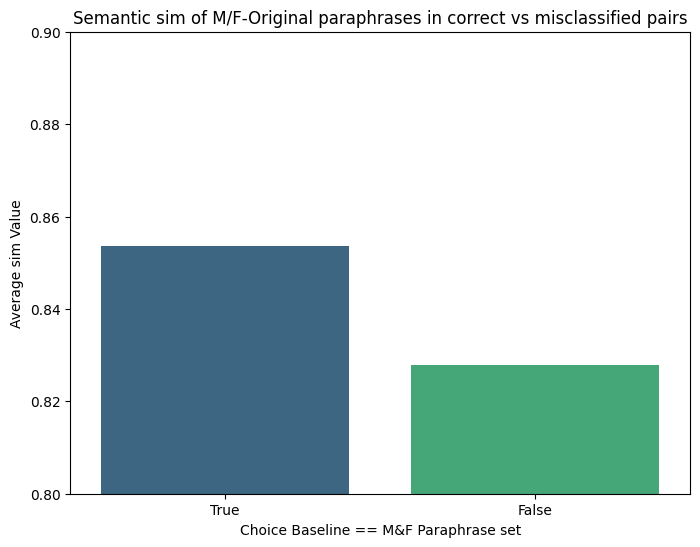

In [54]:
df = pd.DataFrame(data = {'Baseline=M&F': ['True', 'False'], 'Semantic simlarity (Avg)': [0.85351604, 0.82789326]})

# Use Seaborn to create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Baseline=M&F', y='Semantic simlarity (Avg)', data=df,  palette='viridis')

plt.ylim(0.8, 0.9)

# Set plot labels and title
plt.xlabel('Choice Baseline == M&F Paraphrase set')
plt.ylabel('Average sim Value')
plt.title('Semantic sim of M/F-Original paraphrases in correct vs misclassified pairs')

# Show the plot
plt.show()

In [96]:
labels_m = df_base_true['choice_b']==df_base_true['choice_m'] 
labels_f = df_base_true['choice_b']==df_base_true['choice_f']

In [98]:
labels_m = labels_m.reset_index(drop=True)
labels_f = labels_f.reset_index(drop=True)

In [ ]:
## MALE clustering
from sklearn.decomposition import PCA
norm_embeddings = embeddings_o
norm_embeddings = norm_embeddings

pca = PCA(n_components=9)
embeddings_5d = pca.fit_transform(norm_embeddings)

# Create a DataFrame for 5D visualization
df_5d = pd.DataFrame({'Dim1': embeddings_5d[:, 0], 'Dim2': embeddings_5d[:, 1], 'Dim3': embeddings_5d[:, 2],
                      'Dim4': embeddings_5d[:, 3], 'Dim5': embeddings_5d[:, 4], 'Label': labels_m,
                     'Dim6': embeddings_5d[:, 5],
                     'Dim7': embeddings_5d[:, 6],
                     'Dim8': embeddings_5d[:, 7],
                     'Dim9': embeddings_5d[:, 8]})

# Plot pairs of dimensions using a grid plot
sns.set(style="ticks")
sns.set_palette("pastel")

# Create a pairplot
g = sns.PairGrid(df_5d, hue='Label', vars=['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5', 'Dim6', 'Dim7', 'Dim8', 'Dim9'])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.add_legend()

plt.suptitle('Pairplot of Top 5 PCA Dimensions', y=1.02)
plt.show()

In [ ]:
## FEMALE clustering
from sklearn.decomposition import PCA
norm_embeddings = embeddings_f
# -embeddings_o
norm_embeddings = norm_embeddings

pca = PCA(n_components=9)
embeddings_5d = pca.fit_transform(norm_embeddings)

# Create a DataFrame for 5D visualization
df_5d = pd.DataFrame({'Dim1': embeddings_5d[:, 0], 'Dim2': embeddings_5d[:, 1], 'Dim3': embeddings_5d[:, 2],
                      'Dim4': embeddings_5d[:, 3], 'Dim5': embeddings_5d[:, 4], 'Label': labels_f,
                     'Dim6': embeddings_5d[:, 5],
                     'Dim7': embeddings_5d[:, 6],
                     'Dim8': embeddings_5d[:, 7],
                     'Dim9': embeddings_5d[:, 8]})

# Plot pairs of dimensions using a grid plot
sns.set(style="ticks")
sns.set_palette("pastel")

# Create a pairplot
g = sns.PairGrid(df_5d, hue='Label', vars=['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5', 'Dim6', 'Dim7', 'Dim8', 'Dim9'])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.add_legend()

plt.suptitle('Pairplot of Top 5 PCA Dimensions', y=1.02)
plt.show()

In [8]:
# cluster_embeddings = embeddings_f-embeddings_m

In [9]:
# cluster_embeddings_abs = cluster_embeddings
# cluster_embeddings_abs

array([[-8.58051851e-02, -4.71852094e-01,  1.72173902e-01, ...,
         2.39584178e-01, -5.40622920e-02,  9.22283530e-03],
       [ 3.95254433e-01,  1.99283600e-01, -1.28825366e-01, ...,
        -3.92782688e-03,  1.57786384e-01, -1.22730106e-01],
       [ 1.08090937e-01,  2.29758739e-01, -9.82038751e-02, ...,
        -2.70923406e-01, -1.26974687e-01, -2.36667097e-02],
       ...,
       [-9.87960398e-03, -6.76117539e-02, -9.34011936e-02, ...,
        -1.32897645e-01,  5.31192422e-02,  1.55512318e-01],
       [-2.52401084e-01,  2.40686685e-01,  3.48098837e-02, ...,
         2.01027304e-01, -2.51903296e-01, -2.60092318e-04],
       [ 3.16758424e-01, -1.04075596e-01, -1.97242778e-02, ...,
        -1.25989944e-01,  3.02430689e-01,  7.50916824e-02]], dtype=float32)

In [86]:
# !pip install bert_score

from transformers import AutoTokenizer, AutoModel
model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to obtain embeddings for sentences using the model
def get_embeddings(sentences):
    inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Average pooling over tokens
    return embeddings.numpy()

In [88]:
from bert_score import score
import torch

# Function to calculate BERTScore similarity between two lists of sentences
def calculate_bertscore_similarity(sentences1, sentences2):
    # Obtain embeddings for each set of sentences
    embeddings1 = get_embeddings(sentences1)
    embeddings2 = get_embeddings(sentences2)
    
    print(embeddings1)

    # Convert embeddings to lists of strings
    embeddings1_str = [str(embedding) for embedding in embeddings1]
    embeddings2_str = [str(embedding) for embedding in embeddings2]

    # Calculate BERTScore similarity
    precision, recall, f1 = score(embeddings1_str, embeddings2_str, lang='en')

    # Return the F1 score as the similarity measure
    return f1.mean().item()

# Example usage:
sentences_list1 = "This is a sample sentence."
sentences_list2 = "This is another sample sentence"

similarity_score = calculate_bertscore_similarity(sentences_list1, sentences_list2)
print("BERTScore Similarity:", similarity_score)

[[ 0.1671398  -0.22119364 -0.43359107 ... -0.00784593  0.18461818
   0.5269268 ]]


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore Similarity: 0.9151100516319275


In [81]:
# df_base_true

In [ ]:
sim_m_o = np.array([calculate_bertscore_similarity(x, y) for x, y in zip(df_base_true['Paraphrases_m'], df_base_true['Original'])])
sim_f_o = np.array([calculate_bertscore_similarity(x, y) for x, y in zip(df_base_true['Paraphrases_f'], df_base_true['Original'])])
sim_avg = (sim_m_o + sim_f_o)/2
sim_avg

[[-0.0850744   0.06647862 -0.25399616 ... -0.0227569  -0.00548953
  -0.04621651]]


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[-0.26954985  0.32069486 -0.29582712 ... -0.06550589  0.22545224
  -0.02228073]]


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[-0.07518235  0.05748795 -0.07472556 ...  0.13331528  0.1340347
  -0.15712048]]


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[-0.13449322  0.14116915 -0.09368223 ... -0.03969105  0.05311158
   0.05057715]]


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[ 0.10578267 -0.06921225  0.07939508 ...  0.07508714  0.14303187
  -0.05709941]]


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[-0.08405094  0.26776695 -0.31052223 ... -0.00345304  0.04227834
  -0.1000189 ]]


In [92]:
sim_avg

array([0.92336434, 0.93202782, 0.92805174, ..., 0.92365554, 0.92521483,
       0.9229019 ])

In [93]:
df_base_true["avg_sim (BertScore)"]=sim_avg

/tmp/ipykernel_23146/1193669145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_true["avg_sim (BertScore)"]=sim_avg


In [94]:
df_base_true[(df_base_true['choice_m']==df_base_true['choice_b']) & (df_base_true['choice_f']==df_base_true['choice_b'])]['avg_sim (BertScore)'].mean()

0.923218560339904

In [95]:
df_base_true[(df_base_true['choice_m']!=df_base_true['choice_b']) & (df_base_true['choice_f']!=df_base_true['choice_b'])]['avg_sim (BertScore)'].mean()

0.923385782374276